# Exploratory Data Analysis of  7-Day Nutritional Analysis of Healthy Omnivore, Fast Food, and Vegetarian Diets

In this notebook, I’ll perform Exploratory Data Analysis (EDA) on the cleaned nutritional dataset to understand the differences between omnivore, vegetarian, and fast food menus. This analysis aims to identify patterns, summarize key nutritional attributes, and compare these menus on various nutritional factors.

## Loading and Initial Overview of Data

In this section, I’ll load the cleaned dataset and perform an initial overview to understand its structure and content. This high-level exploration will provide a foundation for deeper analysis by helping me:

- Verify that the data has been correctly loaded and cleaned.
- Examine the basic structure, including data types and summary statistics.
- Answer initial questions about average daily intake for calories, protein, fat, and carbohydrates for each menu type (Omnivore, Vegetarian, Fast Food).
- Explore how the nutrient profile varies by menu type and determine the average daily intake of key macronutrients across the 7-day period.

This overview will reveal preliminary insights into the nutritional composition of each menu type, setting the stage for more detailed analysis in subsequent sections.

In [133]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# Load the cleaned dataset
df = pd.read_csv('../data/processed/cleaned_nutrition_data.csv')

#Set the pandas options to display more columns
pd.set_option('display.max_columns', None)   # Show all columns

# Display the first few rows to verify data has loaded correctly
df.head(20)

,Ingredient,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol,Menu Type,Day,Meal
0,3 large eggs,214.50,18.84,14.27,4.6890,5.4870,2.8665,1.08,0.00,0.56,84.0000,2.6250,18.00,297.00,207.0000,213.00,1.9350,0.1080,0.0420,46.050,810.00,0.000,123.0,1.5750,0.450,0.0600,0.6855,0.1125,0.2550,70.50,1.335,2.2995,440.7000,0.0540,0.0015,558.0,omnivore,day 1,breakfast - tomato shakshuka
1,1 small onion,26.40,0.82,0.11,0.0186,0.0162,0.0438,6.09,0.84,2.84,13.2000,0.1440,6.60,21.00,99.6000,1.80,0.1260,0.0402,0.0918,0.360,1.20,3.120,0.0,0.0120,0.300,0.0252,0.0138,0.0990,0.0774,9.00,0.000,0.0678,4.0800,0.0000,0.0000,0.0,omnivore,day 1,breakfast - tomato shakshuka
2,2 large tomatoes,65.52,3.20,0.73,0.1019,0.1128,0.3021,14.16,4.37,9.57,36.4000,0.9828,40.04,87.36,862.6800,18.20,0.6188,0.2148,0.4150,0.000,3032.12,49.868,0.0,1.9656,28.756,0.1347,0.0692,2.1622,0.2912,54.60,0.000,0.3240,24.3880,0.0000,0.0000,0.0,omnivore,day 1,breakfast - tomato shakshuka
3,1 sweet pepper,31.92,1.05,0.23,0.0331,0.0148,0.1208,7.64,1.37,3.64,10.2600,0.5244,11.40,20.52,189.2400,2.28,0.1368,0.0741,0.1311,0.342,533.52,84.816,0.0,0.5700,11.172,0.0673,0.0342,0.5438,0.2656,18.24,0.000,0.0901,8.4360,0.0000,0.0000,0.0,omnivore,day 1,breakfast - tomato shakshuka
4,10 ml olive oil,80.71,0.00,9.13,1.2606,6.6611,0.9607,0.00,0.00,0.00,0.0913,0.0511,0.00,0.00,0.0913,0.18,0.0000,0.0000,0.0000,0.000,0.00,0.000,0.0,1.3101,5.496,0.0000,0.0000,0.0000,0.0000,0.00,0.000,0.0000,0.0274,0.0000,0.0000,0.0,omnivore,day 1,breakfast - tomato shakshuka
5,30 g goat cheese,79.20,5.56,6.32,4.3725,1.4421,0.1503,0.00,0.00,0.00,42.0000,0.5700,4.80,76.80,7.8000,137.70,0.2760,0.2196,0.0300,0.840,309.90,0.000,4.5,0.0540,0.540,0.0210,0.1140,0.1290,0.0750,3.60,0.057,0.2040,4.6200,0.0000,0.0000,13.8,omnivore,day 1,breakfast - tomato shakshuka
6,10 g raw almonds,57.90,2.12,4.99,0.3802,3.1551,1.2329,2.15,1.25,0.44,26.9000,0.3710,27.00,48.10,73.3000,0.10,0.3120,0.1031,0.2179,0.410,0.20,0.000,0.0,2.5630,0.000,0.0205,0.1138,0.3618,0.0137,4.40,0.000,0.0471,5.2100,0.0003,0.0000,0.0,omnivore,day 1,snack
7,15 g raw cashew,82.95,2.73,6.58,1.1675,3.5696,1.1768,4.53,0.50,0.89,5.5500,1.0020,43.80,88.95,99.0000,1.80,0.8670,0.3293,0.2483,2.985,0.00,0.075,0.0,0.1350,5.115,0.0635,0.0087,0.1593,0.0626,3.75,0.000,0.1296,0.0000,0.0000,0.0000,0.0,omnivore,day 1,snack
8,300 g fresh blueberries,171.00,2.22,0.99,0.0840,0.1410,0.4380,43.47,7.20,29.88,18.0000,0.8400,18.00,36.00,231.0000,3.00,0.4800,0.1710,1.0080,0.300,162.00,29.100,0.0,1.7100,57.900,0.1110,0.1230,1.2540,0.1560,18.00,0.000,0.3720,18.0000,0.0000,0.0000,0.0,omnivore,day 1,snack
9,80 g egg tagliatelle,114.40,10.05,7.61,2.5008,2.9264,1.5288,0.58,0.00,0.30,44.8000,1.4000,9.60,158.40,110.4000,113.60,1.0320,0.0576,0.0224,24.560,432.00,0.000,65.6,0.8400,0.240,0.0320,0.3656,0.0600,0.1360,37.60,0.712,1.2264,235.0400,0.0288,0.0008,297.6,omnivore,day 1,lunch - pasta


In [135]:
# Display the last few rows to verify data has loaded correctly
df.tail(20)

,Ingredient,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol,Menu Type,Day,Meal
356,latte grande,192.53,12.86,7.16,4.4438,2.0396,0.3131,19.21,0.00,0.00,471.5340,0.2575,96.8100,371.4690,660.5550,199.04,1.4984,0.0578,0.0357,8.4525,749.700000,3.788400,147.000000,0.0057,0.0567,0.1476,0.7361,3.2831,0.166500,18.9420,1.3965,1.250700,1.4742,0.0000,0.0000,29.40,fast food,day 5,snack
357,1 medium chocolate chip cookie,147.60,1.53,7.42,2.4273,1.8816,2.5251,19.61,0.60,9.87,6.3000,1.6740,12.3000,32.7000,51.3000,93.30,0.2160,0.0969,0.1860,1.1700,0.300000,0.000000,0.000000,0.6030,10.1100,0.0876,0.0891,0.7995,0.017400,21.6000,0.0090,0.422825,3.1500,0.2526,0.0015,0.00,fast food,day 5,snack
358,1 bacon cheeseburger,595.02,33.30,33.46,12.9259,11.4510,1.4179,39.86,2.74,9.77,289.0700,4.3677,48.5300,381.9100,502.1800,1422.14,5.6337,0.2152,0.3503,7.1740,836.420695,1.477000,17.130518,0.0000,0.0000,0.3671,0.7343,8.9316,0.510600,103.3900,2.6375,0.746900,0.0000,0.0000,0.0000,105.50,fast food,day 5,lunch - bacon cheeseburger
359,2 mozzarella sticks,201.50,9.15,11.36,4.2458,2.6834,3.0888,15.59,1.24,1.46,207.0800,0.3844,13.0200,197.1600,66.9600,533.82,1.2834,0.0409,0.1823,11.7180,226.920000,0.000000,4.340000,0.4774,14.1980,0.0639,0.1618,0.4842,0.045900,16.1200,0.5952,0.257300,6.1380,0.3336,0.0006,22.32,fast food,day 5,supper - mozzarella sticks and beef tacos
360,2 beef tacos,586.92,33.66,28.97,12.0225,11.3337,3.2240,48.03,4.02,6.41,310.8800,4.9580,72.3600,460.9600,653.9200,1364.12,5.7620,0.2653,0.7209,51.7240,670.000000,18.720666,17.130518,2.1976,0.0000,0.4342,0.6646,7.0484,0.364500,101.8400,3.2696,1.246200,0.0000,0.2144,0.0000,91.12,fast food,day 5,supper - mozzarella sticks and beef tacos
361,5 pancakes,454.00,12.80,19.40,4.2440,4.9480,8.8940,56.60,0.00,0.00,438.0000,3.6000,32.0000,318.0000,264.0000,878.00,1.1200,0.0980,0.4000,29.8000,392.000000,0.600000,17.130518,0.0000,0.0000,0.4020,0.5620,3.1340,0.092000,76.0000,0.4400,0.810000,0.0000,0.0000,0.0000,118.00,fast food,day 6,breakfast - pancakes with maple syrup
362,30 ml maple syrup,104.67,0.02,0.02,0.0028,0.0044,0.0068,26.99,0.00,24.34,41.0644,0.0443,8.4544,0.8052,85.3495,4.83,0.5918,0.0073,1.1707,0.2416,0.000000,0.000000,0.000000,0.0000,0.0000,0.0266,0.5113,0.0326,0.000800,0.0000,0.0000,0.014500,0.6442,0.0000,0.0000,0.00,fast food,day 6,breakfast - pancakes with maple syrup
363,300 ml orange juice,141.51,2.20,0.63,0.0755,0.1132,0.1258,32.70,0.63,26.42,34.5912,0.6289,34.5912,53.4591,628.9308,3.14,0.1572,0.1384,0.0440,0.3145,628.930800,157.232700,0.000000,0.1258,0.3145,0.2830,0.0943,1.2579,0.125800,94.3396,0.0000,0.597500,19.4969,0.0000,0.0000,0.00,fast food,day 6,breakfast - pancakes with maple syrup
364,1 small cappuccino,119.70,7.62,4.64,2.9299,1.2810,0.2215,11.97,0.00,11.57,275.6840,0.1227,72.5225,214.5940,388.3300,115.80,1.1276,0.0433,0.0616,5.7188,434.625000,0.575900,112.087500,0.0746,0.5167,0.0898,0.5280,3.2930,0.088100,12.0295,1.2124,0.830900,39.0542,0.0183,0.0000,18.30,fast food,day 6,snack
365,1 small blueberry muffin,247.50,2.96,10.61,1.8770,3.1825,5.3480,34.98,0.73,20.77,29.0400,0.8580,6.6000,96.3600,79.8600,221.76,0.2442,0.0396,0.2963,5.4120,48.180000,0.594000,2.640000,1.0758,25.8720,0.1109,0.1076,0.9359,0.026400,31.6800,0.1056,0.310200,61.0500,0.6745,0.0000,19.80,fast food,day 6,snack


### Inspecting the data structure

In [136]:
# Check basic information about the dataset
# This will show column names, non-null counts, and data types.
df.info()

# Describe the dataset to get basic statistics for each numeric column
# This will provide count, mean, std, min, max, and quartiles for each nutrient.
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ingredient           376 non-null    object 
 1   Calories             376 non-null    float64
 2   Protein              376 non-null    float64
 3   Fat                  376 non-null    float64
 4   Saturated Fat        376 non-null    float64
 5   Monounsaturated Fat  376 non-null    float64
 6   Polyunsaturated Fat  376 non-null    float64
 7   Carbohydrates        376 non-null    float64
 8   Fiber                376 non-null    float64
 9   Sugars               375 non-null    float64
 10  Calcium              376 non-null    float64
 11  Iron                 376 non-null    float64
 12  Magnesium            376 non-null    float64
 13  Phosphorus           376 non-null    float64
 14  Potassium            376 non-null    float64
 15  Sodium               376 non-null    flo

,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,375.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,375.000000,376.000000,375.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,375.000000,375.000000,375.000000,376.000000
mean,115.923590,5.494495,5.293378,1.564134,2.113514,1.079251,12.510000,1.907447,3.656240,60.440677,1.098881,26.436027,93.109072,221.927944,172.956303,0.681921,0.111197,0.283975,8.421666,869.784350,19.467502,17.815739,0.755130,26.445084,0.115485,0.129928,1.452969,0.132031,32.530379,0.458152,0.439303,29.697563,0.032008,0.000153,28.961516
std,133.890307,9.600760,7.754588,2.851727,3.443085,2.146022,19.588703,4.088582,7.228897,129.637752,1.907682,43.641413,129.217852,314.322820,439.693815,1.021562,0.158969,0.480914,19.767359,5237.418479,68.394487,85.433715,1.182303,276.001935,0.261706,0.209612,2.990394,0.208065,63.634106,2.526810,0.776836,86.104418,0.135458,0.000897,106.665638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.725000,0.200000,0.170000,0.020450,0.010100,0.043700,0.640000,0.000000,0.010000,4.430000,0.097100,2.243250,4.750000,18.774000,1.020000,0.037775,0.013300,0.023875,0.068425,0.075000,0.000000,0.000000,0.020750,0.045400,0.004400,0.005800,0.042000,0.009825,0.450000,0.000000,0.018125,0.113000,0.000000,0.000000,0.000000
50%,79.650000,1.680000,1.265000,0.223000,0.193500,0.306000,3.405000,0.500000,0.540000,15.813250,0.507300,15.200000,47.180150,99.300000,6.790000,0.309400,0.057800,0.125850,0.426000,19.140000,0.151550,0.000000,0.213900,1.150000,0.037050,0.040700,0.274500,0.068000,9.240000,0.000000,0.140350,4.266000,0.000000,0.000000,0.000000
75%,157.335000,5.570000,7.757500,1.685700,3.330500,1.169450,16.472500,2.007500,3.600000,53.275000,1.343000,36.822925,120.942000,294.967500,122.150000,0.902800,0.141075,0.307225,5.503500,429.948000,5.211000,0.000000,1.050000,8.039500,0.111625,0.148300,1.404999,0.160000,34.000000,0.016850,0.446250,17.408000,0.000250,0.000000,0.000000
max,716.100000,64.510000,37.360000,19.860100,19.699500,15.402400,178.620000,51.150000,65.470000,987.000000,24.710400,624.000000,740.480000,2516.580000,3120.000000,8.235300,1.207100,4.067000,153.373500,88536.500000,724.000000,1194.020000,8.388600,5310.500000,2.930600,1.396000,31.284200,1.759600,620.576500,41.600000,7.280000,1021.072000,1.833000,0.013800,1223.040000


The initial data overview shows that the dataset contains 375 entries with no missing values in any column. Key macronutrients such as Calories, Protein, Fat, and Carbohydrates are represented alongside various micronutrients and quality indicators (e.g., Fiber, Sugars, Sodium). The descriptive statistics reveal the following:

- Mean caloric itake: the average calorie value per entry is approximately 116, with some items reaching as high as 716.1 calories.
- Fat composition: saturated fat and unsaturated fat contents show a wide range, which is expected due to the diversity in food types across menu categories.
- Variability: there is considerable variation across different nutrients, as shown by the standard deviation values.

### Key Question 1: Average daily macronutrient intake for each menu type

#### Aggregate nutrient dat by day and menu type

In [137]:
# Aggregate the total daily intake of nutrients by 'Day' and 'Menu Type'
# This will sum up all nutrient values per day for each menu type

daily_totals = df.groupby(['Menu Type', 'Day']).sum()
daily_totals.reset_index(inplace=True)
daily_totals.head()


,Menu Type,Day,Ingredient,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol,Meal
0,fast food,day 1,1 ham croissant sandwich200 ml orange juicegra...,2194.14,85.13,114.65,43.1906,38.7282,10.1246,209.91,13.28,55.19,1435.6874,13.9139,265.6657,1419.5414,2328.4646,3537.48,10.9279,0.7610,2.0628,87.7622,9222.637900,128.289600,179.564018,5.6997,141.3425,2.2224,2.1340,23.7504,0.803749,547.754100,4.987800,3.530250,141.3568,0.4802,0.0059,259.44,breakfast - ham croissant sandwichbreakfast - ...
1,fast food,day 2,1 ham sandwich200 ml apple juice250 ml caramel...,2007.53,68.23,87.45,25.0693,33.6326,24.7941,245.77,18.36,67.44,829.5570,11.0928,268.2730,1038.4342,2105.8853,4328.82,10.0685,0.7112,2.5545,103.6779,7509.581600,101.670400,40.497000,9.2571,162.1603,1.7596,1.4551,19.4903,1.155000,278.547600,4.400600,3.727700,239.0986,1.0357,0.0010,162.65,breakfast - ham sandwichbreakfast - ham sandwi...
2,fast food,day 3,1 burrito1 small latte1 mini cinnamon roll1 cu...,2167.33,107.23,98.48,33.0346,35.3246,23.2411,212.39,18.97,68.99,881.5252,20.9238,293.7669,1442.4209,2655.4314,2937.95,16.0956,0.7016,1.8020,123.8931,3253.530591,8.600400,246.564055,3.9029,87.8095,1.6261,2.4454,32.7981,1.558900,333.607022,3.631976,5.050600,288.2921,1.6374,0.0007,276.78,breakfast - burritobreakfast - burritosnacksna...
3,fast food,day 4,8 pieces french toast sticks300 ml orange juic...,2496.68,60.87,126.10,38.4197,39.9079,36.2925,287.47,14.67,117.61,1707.4287,12.1785,280.1005,1397.0894,3558.1259,4321.89,5.8956,0.7584,2.6847,138.7784,5550.610200,204.317900,306.581800,6.8917,230.3410,1.8588,1.8355,17.9701,0.873800,639.744700,2.681400,3.719700,163.2483,3.6869,0.0014,198.54,breakfast - french toast sticksbreakfast - fre...
4,fast food,day 5,1 ham egg cheese sandwich300 ml apple juicelat...,2272.01,115.20,109.28,45.1092,36.4996,13.3595,206.94,11.31,62.10,1713.5562,15.5631,296.3079,1880.6966,2614.0901,4894.90,16.7564,0.8622,2.3136,123.7863,3172.379595,147.295266,302.151037,4.3441,25.6148,1.8145,3.0074,24.8723,1.510600,351.553900,8.968600,5.550525,242.5217,0.9409,0.0031,515.13,"breakfast - ham, egg, and cheese sandwichbreak..."


In [138]:
daily_totals.head(40)

,Menu Type,Day,Ingredient,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol,Meal
0,fast food,day 1,1 ham croissant sandwich200 ml orange juicegra...,2194.14,85.13,114.65,43.1906,38.7282,10.1246,209.91,13.28,55.19,1435.6874,13.9139,265.665700,1419.541400,2328.464600,3537.48,10.927900,0.761000,2.062800,87.7622,9222.637900,128.289600,179.564018,5.6997,141.3425,2.222400,2.134000,23.750400,0.803749,547.754100,4.987800,3.530250,141.3568,0.4802,0.0059,259.44,breakfast - ham croissant sandwichbreakfast - ...
1,fast food,day 2,1 ham sandwich200 ml apple juice250 ml caramel...,2007.53,68.23,87.45,25.0693,33.6326,24.7941,245.77,18.36,67.44,829.5570,11.0928,268.273000,1038.434200,2105.885300,4328.82,10.068500,0.711200,2.554500,103.6779,7509.581600,101.670400,40.497000,9.2571,162.1603,1.759600,1.455100,19.490300,1.155000,278.547600,4.400600,3.727700,239.0986,1.0357,0.0010,162.65,breakfast - ham sandwichbreakfast - ham sandwi...
2,fast food,day 3,1 burrito1 small latte1 mini cinnamon roll1 cu...,2167.33,107.23,98.48,33.0346,35.3246,23.2411,212.39,18.97,68.99,881.5252,20.9238,293.766900,1442.420900,2655.431400,2937.95,16.095600,0.701600,1.802000,123.8931,3253.530591,8.600400,246.564055,3.9029,87.8095,1.626100,2.445400,32.798100,1.558900,333.607022,3.631976,5.050600,288.2921,1.6374,0.0007,276.78,breakfast - burritobreakfast - burritosnacksna...
3,fast food,day 4,8 pieces french toast sticks300 ml orange juic...,2496.68,60.87,126.10,38.4197,39.9079,36.2925,287.47,14.67,117.61,1707.4287,12.1785,280.100500,1397.089400,3558.125900,4321.89,5.895600,0.758400,2.684700,138.7784,5550.610200,204.317900,306.581800,6.8917,230.3410,1.858800,1.835500,17.970100,0.873800,639.744700,2.681400,3.719700,163.2483,3.6869,0.0014,198.54,breakfast - french toast sticksbreakfast - fre...
4,fast food,day 5,1 ham egg cheese sandwich300 ml apple juicelat...,2272.01,115.20,109.28,45.1092,36.4996,13.3595,206.94,11.31,62.10,1713.5562,15.5631,296.307900,1880.696600,2614.090100,4894.90,16.756400,0.862200,2.313600,123.7863,3172.379595,147.295266,302.151037,4.3441,25.6148,1.814500,3.007400,24.872300,1.510600,351.553900,8.968600,5.550525,242.5217,0.9409,0.0031,515.13,"breakfast - ham, egg, and cheese sandwichbreak..."
5,fast food,day 6,5 pancakes30 ml maple syrup300 ml orange juice...,1941.81,50.37,91.37,26.7912,31.0161,26.0058,236.67,12.47,87.10,1433.1942,8.3250,270.663500,1269.282400,2215.878200,2469.33,7.463500,0.602500,2.639800,69.0957,8738.450300,190.396866,158.688437,6.7981,126.2392,1.245200,2.335000,11.893600,0.795900,405.659000,2.964000,4.256000,158.8615,1.0159,0.0035,222.11,breakfast - pancakes with maple syrupbreakfast...
6,fast food,day 7,1 ham sandwich200 ml apple juice200 ml latte1 ...,2034.99,80.37,89.31,28.0980,30.1771,11.1074,231.87,14.75,74.69,1087.1552,15.8343,213.817300,1180.152500,1822.338900,4086.06,10.117600,0.833500,2.720600,91.9089,4154.369100,92.442100,118.393018,2.5660,59.5042,2.395800,1.700100,24.339100,0.805449,468.626500,4.174900,2.696550,192.6066,0.7800,0.0069,236.29,breakfast - ham sandwichbreakfast - ham sandwi...
7,omnivore,day 1,3 large eggs1 small onion2 large tomatoes1 swe...,2013.56,147.16,104.70,30.5644,49.1743,16.0325,139.23,33.81,74.69,690.4239,17.0017,503.820000,2068.810000,5237.133900,932.50,13.600200,2.103800,3.937000,236.5930,13051.400000,649.141000,984.100000,21.3413,703.7450,1.549500,2.794200,22.629300,3.953100,607.030000,6.022000,11.043400,1057.0322,0.0831,0.0023,1099.30,breakfast - tomato shakshukabreakfast - tomato...
8,omnivore,day 2,2 slices whole wheat bread100 g herring10 g bu...,1714.80,129.59,74.06,16.5903,36.2938,14.2191,139.94,37.66,25.96,696.8112,16.7917,559.543000,1764.705300,4454.672000,2485.33,10.496200,1.83

#### Calculate the average daily intake across the 7 days for each menu type

In [139]:
# Calculate the average daily intake across the 7-day period for each menu type
average_daily_intake = daily_totals.groupby('Menu Type')[['Calories', 'Protein', 'Fat', 'Carbohydrates']].mean()
average_daily_intake


,Calories,Protein,Fat,Carbohydrates
Menu Type,,,,
fast food,2159.212857,81.057143,102.377143,233.002857
omnivore,1953.720000,133.442857,86.060000,176.282857
vegetarian,2113.820000,80.632857,95.892857,262.680000


#### Conclusion

Based on the aggregated daily intakes, several insights are apparent:

1. Calories: the calorie intake for each menu type varies significantly across the days. Both the omnivore (day 5) and vegetarian (day 6) diets show peaks close to or above 2500 calories. In contrast, the fast food menu exhibits a relatively balanced calorie intake across the week, staying mostly within a similar range without extreme highs or lows. This suggests that the fast food diet may be more consistent in caloric content, though it's not necessarily more balanced nutritionally.

2. Protein: the omnivore diet shows a particularly high protein intake on day 5, reaching levels that could indicate an imbalance or an exceptionally protein-rich meal. This spike suggests a potential need for more balanced distribution of protein sources across the week to avoid overloading on specific days.

3. Nutritional Balance: while all menu types show fluctuations in various nutrients, the omnivore and vegetarian menus exhibit more pronounced highs and lows, especially in calorie and protein content. This variability might indicate room for improvement in meal planning to achieve more consistent nutrient distribution across the week.

## Macronutrient Analysis

In this section, I will delve deeper into the macronutrient content (Calories, Protein, Fat, Carbohydrates) of each menu type to understand the variations and patterns across different dietary choices. By analyzing the macronutrient profile, I aim to uncover significant differences in nutrient distribution, which may provide insights into the balance and potential health impacts of each menu type.

To gain a more precise understanding of the nutrient patterns and identify any extreme values within each menu type, I will separate the data by menu type (Omnivore, Vegetarian, and Fast Food).

In [140]:
# Filter daily totals for each menu type
omnivore_daily_totals = daily_totals[daily_totals['Menu Type'] == 'omnivore']
vegetarian_daily_totals = daily_totals[daily_totals['Menu Type'] == 'vegetarian']
fast_food_daily_totals = daily_totals[daily_totals['Menu Type'] == 'fast food']

In [141]:
omnivore_daily_totals.head(7)

,Menu Type,Day,Ingredient,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol,Meal
7,omnivore,day 1,3 large eggs1 small onion2 large tomatoes1 swe...,2013.56,147.16,104.70,30.5644,49.1743,16.0325,139.23,33.81,74.69,690.4239,17.0017,503.820000,2068.810000,5237.133900,932.50,13.600200,2.103800,3.937000,236.5930,13051.4000,649.1410,984.100000,21.3413,703.7450,1.549500,2.794200,22.629300,3.953100,607.030000,6.022000,11.043400,1057.0322,0.0831,0.0023,1099.30,breakfast - tomato shakshukabreakfast - tomato...
8,omnivore,day 2,2 slices whole wheat bread100 g herring10 g bu...,1714.80,129.59,74.06,16.5903,36.2938,14.2191,139.94,37.66,25.96,696.8112,16.7917,559.543000,1764.705300,4454.672000,2485.33,10.496200,1.830500,5.656847,201.5160,3353.7439,133.7045,235.930518,13.7156,228.5354,1.084000,1.681400,30.011500,3.057200,276.339500,20.973000,6.439225,300.1412,0.2588,0.0043,432.90,breakfast - smurkbrod with herringbreakfast - ...
9,omnivore,day 3,3 eggs50 ml milk15 g butter1 g ground black pe...,1408.35,94.06,65.70,22.7009,27.2451,9.7762,121.26,27.90,33.83,818.4883,15.6121,302.192200,1404.310300,2810.461400,1431.84,9.263400,1.620500,3.772200,133.1841,4579.9246,332.2691,179.587618,9.7937,254.4333,0.983400,1.812100,11.068600,1.679400,402.888300,5.733100,6.290825,571.5087,0.1683,0.0018,827.13,breakfast - classic omeletbreakfast - classic ...
10,omnivore,day 4,2 eggs3 tbsp kimchi3 tbsp chickpea flour10 g g...,2179.01,152.40,65.61,16.7604,29.0702,13.6922,259.32,28.28,67.75,758.1983,24.0504,616.608800,2450.878300,6448.665700,2671.28,12.834500,2.917200,5.058893,372.4247,40559.9193,997.2925,486.365518,24.7478,148.1291,2.299100,2.141500,56.963700,4.665300,612.710822,8.942100,9.655675,870.2099,0.1115,0.0010,917.72,breakfast - kimchi pancakesbreakfast - kimchi ...
11,omnivore,day 5,2 large zucchini2 eggs50 g mozzarella3 tbsp co...,2596.47,173.10,129.38,29.6130,49.6425,37.9601,199.90,26.63,48.14,1529.7153,41.4889,1138.274884,2885.250362,6102.717181,4006.94,13.193859,2.236901,5.123447,359.8833,17437.4206,338.2845,1660.310518,18.5954,192.7969,2.732896,3.310847,38.005733,4.271249,868.078122,55.790576,16.727825,1715.8804,0.0555,0.0010,1862.75,breakfast - zucchini wafflesbreakfast - zucchi...
12,omnivore,day 6,2 eggs1 small cauliflower head1/2 bunch green ...,2068.31,118.87,103.23,38.5383,37.3291,14.6035,195.88,40.00,58.19,1006.0162,23.6165,518.688000,1615.790300,4385.460300,5640.41,14.304400,2.780300,7.600800,170.5760,93152.8003,492.1217,131.632018,14.8235,5504.8983,1.686800,2.497400,24.200200,3.375800,562.337400,20.806800,7.500500,704.7411,0.4190,0.0154,653.16,breakfast - perfect winter scrambled eggsbreak...
13,omnivore,day 7,3 eggs50 ml milk15 g butter1 g ground black pe...,1695.54,118.92,59.74,19.5951,22.2934,11.7198,178.45,34.36,40.46,812.8176,18.0053,447.004000,1820.166100,3369.088100,5046.82,13.029600,2.474000,4.980800,261.0236,4672.8206,255.7774,199.767100,20.7754,71.1927,1.449500,2.041400,32.763800,2.156200,462.547400,5.621800,6.404500,903.7271,0.1806,0.0020,1075.98,breakfast - classic omeletbreakfast - classic ...


In [142]:
vegetarian_daily_totals.head(7)

,Menu Type,Day,Ingredient,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol,Meal
14,vegetarian,day 1,1 avocado haas3 slices whole wheat bread5 cher...,2197.07,76.16,125.70,26.9527,58.7078,31.7155,216.26,39.24,66.36,1292.2316,19.5785,459.7684,1274.127600,3893.4154,3472.73,10.6492,2.831500,7.925193,111.3443,1964.1978,365.301700,14.000000,12.5235,103.1959,1.912000,1.922700,23.968800,2.015500,524.633200,0.114000,11.447850,277.1030,0.4191,0.0010,43.00,breakfast - avocado toastbreakfast - avocado t...
15,vegetarian,day 2,0.75 cup boiled spelt0.5 cup boiled oatmeal15 ...,2156.08,67.41,79.78,11.9466,44.9366,16.7352,322.01,48.18,58.47,580.4990,21.9751,702.6745,1693.426900,4417.5920,2374.39,16.5747,3.319000,8.435300,53.0197,25450.0300,571.078200,34.261037,16.4056,545.7116,4.510500,2.307100,25.887700,2.440200,1223.567222,0.400200,10.031450,229.1086,0.0215,0.0000,0.56,breakfast - berry breakfast with speltbreakfas...
16,vegetarian,day 3,1/3 cup coconut chips2 eggs1 tbsp coconut milk...,1775.35,91.06,70.24,24.6517,25.5047,14.7567,221.06,52.08,68.99,1251.1448,28.1467,468.2303,1817.469200,4832.5370,2131.66,14.3731,3.145000,7.108900,108.8859,4577.5320,237.454500,198.000000,7.3035,390.4197,2.082500,2.915500,31.806800,2.354300,617.613900,0.890000,11.305600,735.4094,0.0396,0.0010,372.00,breakfast - coconut pancakes without flourbrea...
17,vegetarian,day 4,1/2 head cauliflower1/2 fennel bulb10 ml olive...,1565.09,67.60,60.00,19.9182,23.0046,11.6809,216.23,36.89,30.36,660.8102,20.1837,469.4121,1475.462800,4795.2879,531.81,11.8053,1.950600,4.640100,67.1965,32685.5229,912.003100,140.444218,18.9309,95.2406,3.553700,2.925100,18.830700,2.263500,902.611722,1.531000,10.802800,664.4218,0.1562,0.0018,560.68,breakfast - cauliflower frittatabreakfast - ca...
18,vegetarian,day 5,3 eggs1 g ground black pepper1/2 tbsp butter5 ...,2154.12,64.35,133.76,35.9881,71.7606,18.2093,194.81,45.88,38.83,877.3460,14.5991,501.2675,1572.494100,3482.8188,1239.27,12.4085,1.920600,5.117100,80.6199,6982.9009,327.379500,156.139918,19.3243,198.0997,1.028500,2.392100,11.068100,2.374800,585.703000,3.040300,8.802650,590.4639,0.3056,0.0015,662.34,breakfast - frittata with leeks and zucchinibr...
19,vegetarian,day 6,2 tbsp flaxpinch salt350 ml soy milk2 tbsp coc...,2551.44,81.28,69.80,20.0340,23.8823,14.2240,457.73,117.15,191.47,1120.1731,29.2978,770.0526,1678.784962,8316.9230,3489.67,12.6126,4.165701,9.281947,49.3411,28950.8993,704.015466,210.425337,30.4392,282.4234,3.479892,2.426247,32.167565,5.006498,1027.606445,4.891976,8.367575,433.8753,0.1065,0.0006,33.07,breakfast - three-minute flax porridgebreakfas...
20,vegetarian,day 7,100 ml light coconut milk150 ml soy milk2 eggs...,2397.59,116.57,131.97,34.5482,50.5501,35.5485,210.66,45.33,34.47,1542.9150,25.0002,593.8149,1859.717262,3597.9197,3000.49,13.9318,3.284101,11.358193,222.0358,8018.2440,130.944900,697.499000,15.7496,365.0734,2.147796,2.772700,31.829833,2.527049,532.262600,5.699200,11.826725,656.9781,0.1008,0.0010,478.00,breakfast - green spinach pancakesbreakfast - ...


In [143]:
fast_food_daily_totals.head(7)

,Menu Type,Day,Ingredient,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol,Meal
0,fast food,day 1,1 ham croissant sandwich200 ml orange juicegra...,2194.14,85.13,114.65,43.1906,38.7282,10.1246,209.91,13.28,55.19,1435.6874,13.9139,265.6657,1419.5414,2328.4646,3537.48,10.9279,0.7610,2.0628,87.7622,9222.637900,128.289600,179.564018,5.6997,141.3425,2.2224,2.1340,23.7504,0.803749,547.754100,4.987800,3.530250,141.3568,0.4802,0.0059,259.44,breakfast - ham croissant sandwichbreakfast - ...
1,fast food,day 2,1 ham sandwich200 ml apple juice250 ml caramel...,2007.53,68.23,87.45,25.0693,33.6326,24.7941,245.77,18.36,67.44,829.5570,11.0928,268.2730,1038.4342,2105.8853,4328.82,10.0685,0.7112,2.5545,103.6779,7509.581600,101.670400,40.497000,9.2571,162.1603,1.7596,1.4551,19.4903,1.155000,278.547600,4.400600,3.727700,239.0986,1.0357,0.0010,162.65,breakfast - ham sandwichbreakfast - ham sandwi...
2,fast food,day 3,1 burrito1 small latte1 mini cinnamon roll1 cu...,2167.33,107.23,98.48,33.0346,35.3246,23.2411,212.39,18.97,68.99,881.5252,20.9238,293.7669,1442.4209,2655.4314,2937.95,16.0956,0.7016,1.8020,123.8931,3253.530591,8.600400,246.564055,3.9029,87.8095,1.6261,2.4454,32.7981,1.558900,333.607022,3.631976,5.050600,288.2921,1.6374,0.0007,276.78,breakfast - burritobreakfast - burritosnacksna...
3,fast food,day 4,8 pieces french toast sticks300 ml orange juic...,2496.68,60.87,126.10,38.4197,39.9079,36.2925,287.47,14.67,117.61,1707.4287,12.1785,280.1005,1397.0894,3558.1259,4321.89,5.8956,0.7584,2.6847,138.7784,5550.610200,204.317900,306.581800,6.8917,230.3410,1.8588,1.8355,17.9701,0.873800,639.744700,2.681400,3.719700,163.2483,3.6869,0.0014,198.54,breakfast - french toast sticksbreakfast - fre...
4,fast food,day 5,1 ham egg cheese sandwich300 ml apple juicelat...,2272.01,115.20,109.28,45.1092,36.4996,13.3595,206.94,11.31,62.10,1713.5562,15.5631,296.3079,1880.6966,2614.0901,4894.90,16.7564,0.8622,2.3136,123.7863,3172.379595,147.295266,302.151037,4.3441,25.6148,1.8145,3.0074,24.8723,1.510600,351.553900,8.968600,5.550525,242.5217,0.9409,0.0031,515.13,"breakfast - ham, egg, and cheese sandwichbreak..."
5,fast food,day 6,5 pancakes30 ml maple syrup300 ml orange juice...,1941.81,50.37,91.37,26.7912,31.0161,26.0058,236.67,12.47,87.10,1433.1942,8.3250,270.6635,1269.2824,2215.8782,2469.33,7.4635,0.6025,2.6398,69.0957,8738.450300,190.396866,158.688437,6.7981,126.2392,1.2452,2.3350,11.8936,0.795900,405.659000,2.964000,4.256000,158.8615,1.0159,0.0035,222.11,breakfast - pancakes with maple syrupbreakfast...
6,fast food,day 7,1 ham sandwich200 ml apple juice200 ml latte1 ...,2034.99,80.37,89.31,28.0980,30.1771,11.1074,231.87,14.75,74.69,1087.1552,15.8343,213.8173,1180.1525,1822.3389,4086.06,10.1176,0.8335,2.7206,91.9089,4154.369100,92.442100,118.393018,2.5660,59.5042,2.3958,1.7001,24.3391,0.805449,468.626500,4.174900,2.696550,192.6066,0.7800,0.0069,236.29,breakfast - ham sandwichbreakfast - ham sandwi...


### Key Question 2: Which menu type provides the highest daily protein intake on average?


Proteins are essential macronutrients that support muscle growth, tissue repair, and immune function. They are composed of amino acids, some of which are essential and must be obtained through the diet. Common sources of protein include meat, dairy, legumes, and nuts. A balanced intake of protein is vital for overall health, as it plays a crucial role in maintaining and building bodily structures and supporting metabolic processes.

In [144]:
# Calculate the average daily protein intake for each menu type
average_daily_protein = daily_totals.groupby('Menu Type')['Protein'].mean()

# Display the results
average_daily_protein.sort_values(ascending=False)

Menu Type
omnivore      133.442857
fast food      81.057143
vegetarian     80.632857
Name: Protein, dtype: float64

In [145]:
# Filter for top protein-contributing ingredients in the omnivore menu
omnivore_protein_top = (
    df[df['Menu Type'] == 'omnivore']
    .sort_values(by='Protein', ascending=False)
    [['Ingredient', 'Day', 'Meal', 'Protein']]
    .head(10)
)

# Display the results
omnivore_protein_top

,Ingredient,Day,Meal,Protein
14,350 g raw sea bass,day 1,supper - very tender sea bass,64.51
196,13 tbsp caviar,day 5,lunch - quick pasta with pollock caviar,51.17
199,1 wild salmon steak,day 5,supper - wild salmon steaks with vegetables,50.17
39,200 g pollock fish,day 2,supper - baked wild alaska pollock,49.84
249,200 g prawns,day 7,lunch - spaghetti with chili and shrimp,45.56
172,200 g prawns,day 4,lunch - spaghetti with chili and shrimp,45.56
57,170 g perch fillet,day 3,supper - instant light pike perch with rosemary,42.26
174,1 tuna steak,day 4,supper - tuna steak with quinoa salad and bake...,41.32
31,120 g chicken leg,day 2,lunch - chicken legs with potatoes and tomatoes,28.84
20,100 g herring,day 2,breakfast - smurkbrod with herring,23.03


Upon reviewing the dataset, it was observed that certain entries, such as '13 tbsp caviar,' may contain errors in portion size. For example, 13 tablespoons of caviar is an unusually large amount for a single meal and is likely to distort nutrient analysis, especially sodium and protein levels. To address this, we will make adjustments to such entries, reducing the portion size to a more realistic quantity

In [146]:
# Locate the row with "13 tbsp caviar" and divide its nutritional values by 10
df.loc[df['Ingredient'] == '13 tbsp caviar', [
    'Calories', 'Protein', 'Fat', 'Saturated Fat', 'Monounsaturated Fat', 
    'Polyunsaturated Fat', 'Carbohydrates', 'Fiber', 'Sugars', 'Calcium', 'Iron', 
    'Magnesium', 'Phosphorus', 'Potassium', 'Sodium', 'Zinc', 'Copper', 'Manganese', 
    'Selenium', 'Vitamin A', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 
    'Thiamin', 'Riboflavin', 'Niacin', 'Vitamin B6', 'Folate', 'Vitamin B12', 
    'Pantothenic Acid', 'Choline', 'Omega-3 Fatty Acids', 'Omega-6 Fatty Acids', 
    'Cholesterol'
]] /= 10

# Change the ingredient name to "1.3 tbsp caviar"
df.loc[df['Ingredient'] == '13 tbsp caviar', 'Ingredient'] = '1.3 tbsp caviar'

# Verify the changes
df.loc[df['Ingredient'] == '1.3 tbsp caviar']

,Ingredient,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol,Menu Type,Day,Meal
196,1.3 tbsp caviar,54.912,5.117,3.723,0.84448,0.96325,1.54024,0.832,0.0,0.0,57.2,2.47104,62.4,74.048,37.648,312.0,0.1976,0.02288,0.0104,13.624,188.24,0.0,24.336,0.39312,0.1248,0.03952,0.12896,0.02496,0.06656,10.4,4.16,0.728,102.1072,0.0,0.0,122.304,omnivore,day 5,lunch - quick pasta with pollock caviar


Now that I’ve adjusted the portion size for "13 tbsp caviar" to a more realistic "1.3 tbsp," I’ll need to update the aggregated daily totals to reflect this change. Re-running the grouping and summing step will ensure the corrected values are accurately included in the daily nutrient totals for each menu type.

In [147]:
# Aggregate the total daily intake of nutrients by 'Day' and 'Menu Type'
# This will sum up all nutrient values per day for each menu type

daily_totals = df.groupby(['Menu Type', 'Day']).sum()
daily_totals.reset_index(inplace=True)
daily_totals.head()

,Menu Type,Day,Ingredient,Calories,Protein,Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Carbohydrates,Fiber,Sugars,Calcium,Iron,Magnesium,Phosphorus,Potassium,Sodium,Zinc,Copper,Manganese,Selenium,Vitamin A,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Thiamin,Riboflavin,Niacin,Vitamin B6,Folate,Vitamin B12,Pantothenic Acid,Choline,Omega-3 Fatty Acids,Omega-6 Fatty Acids,Cholesterol,Meal
0,fast food,day 1,1 ham croissant sandwich200 ml orange juicegra...,2194.14,85.13,114.65,43.1906,38.7282,10.1246,209.91,13.28,55.19,1435.6874,13.9139,265.6657,1419.5414,2328.4646,3537.48,10.9279,0.7610,2.0628,87.7622,9222.637900,128.289600,179.564018,5.6997,141.3425,2.2224,2.1340,23.7504,0.803749,547.754100,4.987800,3.530250,141.3568,0.4802,0.0059,259.44,breakfast - ham croissant sandwichbreakfast - ...
1,fast food,day 2,1 ham sandwich200 ml apple juice250 ml caramel...,2007.53,68.23,87.45,25.0693,33.6326,24.7941,245.77,18.36,67.44,829.5570,11.0928,268.2730,1038.4342,2105.8853,4328.82,10.0685,0.7112,2.5545,103.6779,7509.581600,101.670400,40.497000,9.2571,162.1603,1.7596,1.4551,19.4903,1.155000,278.547600,4.400600,3.727700,239.0986,1.0357,0.0010,162.65,breakfast - ham sandwichbreakfast - ham sandwi...
2,fast food,day 3,1 burrito1 small latte1 mini cinnamon roll1 cu...,2167.33,107.23,98.48,33.0346,35.3246,23.2411,212.39,18.97,68.99,881.5252,20.9238,293.7669,1442.4209,2655.4314,2937.95,16.0956,0.7016,1.8020,123.8931,3253.530591,8.600400,246.564055,3.9029,87.8095,1.6261,2.4454,32.7981,1.558900,333.607022,3.631976,5.050600,288.2921,1.6374,0.0007,276.78,breakfast - burritobreakfast - burritosnacksna...
3,fast food,day 4,8 pieces french toast sticks300 ml orange juic...,2496.68,60.87,126.10,38.4197,39.9079,36.2925,287.47,14.67,117.61,1707.4287,12.1785,280.1005,1397.0894,3558.1259,4321.89,5.8956,0.7584,2.6847,138.7784,5550.610200,204.317900,306.581800,6.8917,230.3410,1.8588,1.8355,17.9701,0.873800,639.744700,2.681400,3.719700,163.2483,3.6869,0.0014,198.54,breakfast - french toast sticksbreakfast - fre...
4,fast food,day 5,1 ham egg cheese sandwich300 ml apple juicelat...,2272.01,115.20,109.28,45.1092,36.4996,13.3595,206.94,11.31,62.10,1713.5562,15.5631,296.3079,1880.6966,2614.0901,4894.90,16.7564,0.8622,2.3136,123.7863,3172.379595,147.295266,302.151037,4.3441,25.6148,1.8145,3.0074,24.8723,1.510600,351.553900,8.968600,5.550525,242.5217,0.9409,0.0031,515.13,"breakfast - ham, egg, and cheese sandwichbreak..."


In [148]:
# Calculate the average daily protein intake for each menu type
average_daily_protein = daily_totals.groupby('Menu Type')['Protein'].mean()

# Display the results
average_daily_protein.sort_values(ascending=False)

Menu Type
omnivore      126.863857
fast food      81.057143
vegetarian     80.632857
Name: Protein, dtype: float64

Based on the results, the *omnivore menu* type provides the highest average daily protein intake at approximately 124 grams, followed by fast food at around 81 grams, and vegetarian at about 80 grams. This indicates that the *omnivore diet* is notably richer in protein compared to the other two menu types.

This could be due to the inclusion of a variety of animal-based protein sources in the omnivore menu. The relatively close protein intake values between *fast food* and *vegetarian* options might suggest that while vegetarian menus can provide adequate protein, fast food menus also contribute a significant amount, possibly due to processed meats or protein-rich additives.

### Key Question 3: How does the fat composition (saturated, monounsaturated, polyunsaturated) vary between menu types?

In the context of a balanced diet, fats play an essential role in energy storage, cellular function, and hormone production.

- Saturated Fat: typically found in animal products and some plant oils; excessive intake is linked to cardiovascular risk.
- Monounsaturated Fat: known for supporting heart health, commonly found in olive oil, nuts, and avocados.
- Polyunsaturated Fat: includes essential fatty acids like Omega-3 and Omega-6, beneficial for brain and heart health, found in fish, seeds, and vegetable oils.

These fats vary across menu types, influencing overall dietary health and balance.

In [149]:
# Calculate the average daily intake of each type of fat (saturated, monounsaturated, polyunsaturated) for each menu type
average_fat_composition = daily_totals.groupby('Menu Type')[['Saturated Fat', 'Monounsaturated Fat', 'Polyunsaturated Fat']].mean()

# Display the result
average_fat_composition

,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat
Menu Type,,,
fast food,34.244657,35.040871,20.703571
omnivore,23.823154,34.625593,14.877320
vegetarian,24.862786,42.620957,20.410014


In [150]:
# Filter for top saturated fat-contributing ingredients in the fast food menu
fast_food_saturated_fat_top = (
    df[df['Menu Type'] == 'fast food']
    .sort_values(by='Saturated Fat', ascending=False)
    [['Ingredient', 'Day', 'Meal', 'Saturated Fat']]
    .head(5)
)

# Display the results
fast_food_saturated_fat_top

,Ingredient,Day,Meal,Saturated Fat
352,1.5 grilled cheese sandwich,day 4,supper - grilled cheese with tomato soup,19.8601
145,1 cheeseburger,day 2,lunch - cheeseburger with green salad,13.9957
358,1 bacon cheeseburger,day 5,lunch - bacon cheeseburger,12.9259
133,1 ham croissant sandwich,day 1,breakfast - ham croissant sandwich,12.7968
153,1 whopper,day 3,lunch - whopper,12.3675


The analysis reveals distinct fat compositions across menu types:

- Fast Food: highest in saturated fat (34.24g), indicating more processed and less healthy fats.
- Omnivore: balanced fat profile, with monounsaturated fat being the highest (33.1g).
- Vegetarian: highest in monounsaturated fats (42.62g), likely due to plant-based oils and nuts, which are healthier fat sources.

Overall, the analysis indicates that fast food tends to be higher in saturated fat, while the vegetarian and omnivore diets are richer in healthier fats, particularly monounsaturated fats. This insight suggests that menu choices significantly affect the types of fats consumed, with potential health implications for each diet. The top contributors to saturated fat in the fast food menu, such as cheeseburgers and grilled cheese sandwiches, reflect typical high-saturated-fat fast food items, reinforcing the need for moderation in these options.

### Key Question 4: What is the daily fiber intake for each menu type, and how does it compare to recommended levels?

Fiber is a crucial component of a healthy diet, aiding in digestion and supporting overall wellness. Government guidelines recommend a daily fiber intake between 22.4 g and 33.6 g, depending on age and sex. For more information, refer to the [Government Dietary Guidelines](https://odphp.health.gov/our-work/nutrition-physical-activity/dietary-guidelines/previous-dietary-guidelines/2015).


In [151]:
# Calculate the average daily fiber intake for each menu type
average_daily_fiber = daily_totals.groupby('Menu Type')['Fiber'].mean()
average_daily_fiber

Menu Type
fast food     14.830000
omnivore      32.662857
vegetarian    54.964286
Name: Fiber, dtype: float64

In [152]:
# Filter for top fiber-contributing ingredients in the vegetarian menu
vegetarian_fiber_top = (
    df[df['Menu Type'] == 'vegetarian']
    .sort_values(by='Fiber', ascending=False)
    [['Ingredient', 'Day', 'Meal', 'Fiber']]
    .head(5)
)

# Display the results
vegetarian_fiber_top

,Ingredient,Day,Meal,Fiber
317,3 large eggplants,day 6,"supper - vegetable caviar of eggplant, peppers...",51.15
333,400 g fresh blackberries,day 7,snack,21.20
118,400 g red currant,day 3,snack,17.20
127,300 g fresh green peas,day 3,supper - stewed young peas with rice (croatian...,16.50
305,1 cup red lentils,day 6,"lunch - spicy soup with red lentils, roots and...",15.64


The vegetarian menu provides the highest fiber intake (55g), exceeding the recommended 22.4–33.6g. The omnivore menu meets recommendations (33g), while the fast food menu falls short at 15g, indicating a potential fiber deficiency.Top fiber sources in the vegetarian menu, like eggplants, blackberries, and lentils, emphasize the importance of diverse plant-based foods for a high-fiber, digestive-friendly diet.

### Key Question 6: How do carbohydrate levels differ across menu types? Are there significant differences in daily intake?

Carbohydrates are a primary energy source and vary in quantity across different dietary patterns. In this step, I will analyze the average daily carbohydrate intake for each menu type to determine if there are significant differences in intake.

In [153]:
# Calculate the average daily carbohydrate intake for each menu type
average_daily_carbs = daily_totals.groupby('Menu Type')['Carbohydrates'].mean()
average_daily_carbs


Menu Type
fast food     233.002857
omnivore      175.213143
vegetarian    262.680000
Name: Carbohydrates, dtype: float64

In [154]:
# Filter for top carbohydrate-contributing ingredients in the vegetarian menu
vegetarian_carbs_top = (
    df[df['Menu Type'] == 'vegetarian']
    .sort_values(by='Carbohydrates', ascending=False)
    [['Ingredient', 'Day', 'Meal', 'Carbohydrates']]
    .head(5)
)

# Display the results
vegetarian_carbs_top

,Ingredient,Day,Meal,Carbohydrates
317,3 large eggplants,day 6,"supper - vegetable caviar of eggplant, peppers...",178.62
327,100 g whole wheat flour,day 7,breakfast - green spinach pancakes,71.97
285,250 g gluten-free pasta,day 5,lunch - pasta aglio olio,69.78
334,0.5 cup dry corn grits,day 7,lunch - polenta with mushroom gravy,67.92
70,0.5 cup dry corn grits,day 1,lunch - polenta with mushroom gravy,67.92


The vegetarian menu has the highest daily carbohydrate intake (263g), followed by fast food (233g), while the omnivore menu has the lowest (177g). This suggests vegetarian and fast food menus are more energy-dense due to higher carbohydrate content.

## Micronutrient Analysis

In this section, I will explore the micronutrient content (essential vitamins and minerals) of each menu type to assess nutritional quality. Micronutrients like vitamins and minerals are crucial for various bodily functions, including immune support, bone health, and energy production. 

### Key Question 7: What are the daily average levels of Vitamins C, B, and B12 across menu types?

Vitamins C, B, and B12 play essential roles in maintaining health. Vitamin C supports immune function and skin health, B vitamins contribute to energy metabolism, and Vitamin B12 is crucial for red blood cell formation and neurological function. 

In [155]:
# Calculate the average daily intake of Vitamins C, B (B1, B2, B3, B6), and B12 for each menu type
average_vitamins = daily_totals.groupby('Menu Type')[['Vitamin C', 'Thiamin', 'Riboflavin', 'Niacin', 'Vitamin B6', 'Vitamin B12']].mean()

# Display the results
average_vitamins

,Vitamin C,Thiamin,Riboflavin,Niacin,Vitamin B6,Vitamin B12
Menu Type,,,,,,
fast food,124.716076,1.846057,2.130357,22.159129,1.071914,4.544182
omnivore,456.941529,1.632788,2.159744,30.774028,3.222744,12.349911
vegetarian,464.025338,2.673555,2.523064,25.079928,2.711692,2.366668


The analysis shows that all menu types generally meet or exceed daily recommended intakes for vitamins C, B1, B2, B3, and B6. However, the vegetarian menu may lack sufficient Vitamin B12, which is commonly found in animal products. Note that specific daily requirements for these vitamins vary based on age and sex. For more information, refer to the [Government Dietary Guidelines](https://www.medicalnewstoday.com/articles/micros-vs-macros#how-much-you-need).

### Key Question 8: Which menu type provides the highest levels of Iron, Calcium, and Potassium?

Iron, calcium, and potassium are essential minerals that play critical roles in the body. Iron supports oxygen transport and energy production, calcium is crucial for bone health, potassium helps regulate fluid balance and nerve function and zinc is essential for immune function, wound healing, and protein synthesis.

In [156]:
# Calculate the average daily intake of Iron, Calcium, and Potassium for each menu type
average_minerals = daily_totals.groupby('Menu Type')[['Iron', 'Calcium', 'Potassium', 'Zinc']].mean()

# Display the results
average_minerals

,Iron,Calcium,Potassium,Zinc
Menu Type,,,,
fast food,13.975914,1298.300557,2471.459200,11.046443
omnivore,19.189606,828.238686,4638.480940,12.134823
vegetarian,22.683014,1046.445671,4762.356257,13.193600


Based on the average daily intake:

- Iron: the omnivore and vegetarian menus are generally within the recommended daily range (typically 8–18 mg for adults), while the fast food menu falls slightly below this range.
- Calcium: the omnivore and vegetarian menus provide amounts close to the recommended 1000–1300 mg per day for adults, but the fast food menu is somewhat lower.
- Potassium: both the omnivore and vegetarian menus exceed the recommended daily intake of around 2600–3400 mg, while the fast food menu just meets the lower end of this range.
- Zinc: the recommended daily intake for zinc is around 8–11 mg for adults. All provide adequate zinc levels.

Overall, the omnivore and vegetarian menus generally meet or exceed the daily recommended intakes for these minerals, indicating a more balanced micronutrient profile compared to the fast food menu, which tends to fall short in iron and calcium. For more information, refer to the [Government Dietary Guidelines](https://www.medicalnewstoday.com/articles/micros-vs-macros#how-much-you-need).

### Key Question 9: How does Sodium intake vary daily, and which menu type tends to have the highest Sodium levels?

Sodium is an essential mineral that helps regulate fluid balance, blood pressure, and muscle function. However, excessive intake can lead to health issues like hypertension.

In [157]:
# Calculate the average daily intake of Sodium for each menu type
average_sodium = daily_totals.groupby('Menu Type')['Sodium'].mean()

# Display the results
average_sodium

Menu Type
fast food     3796.632857
omnivore      2772.445714
vegetarian    2320.002857
Name: Sodium, dtype: float64

The recommended daily sodium intake is about 2,300 mg (with an ideal limit of 1,500 mg for those at risk of hypertension).

- Fast food: 3,796.63 mg – significantly exceeds the recommendation.
- Omnivore:  2762.5 mg – also above the recommended limit.
- Vegetarian: 2,320 mg – closer to the target but still slightly high.

All menu types exceed the recommended sodium intake, with fast food and omnivore diets particularly high, posing potential health risks.

I’ll examine which ingredients contribute most to the high sodium levels in the omnivore and vegetarian menus. By analyzing the sodium content of individual ingredients, I can identify key items driving up sodium intake and explore possible adjustments to achieve a more balanced diet.

In [158]:
# Filter for top sodium-contributing ingredients in the omnivore menu
omnivore_sodium_top = (
    df[df['Menu Type'] == 'omnivore']
    .sort_values(by='Sodium', ascending=False)
    [['Ingredient', 'Day', 'Meal', 'Sodium']]
    .head(10)
)

# Filter for top sodium-contributing ingredients in the vegetarian menu
vegetarian_sodium_top = (
    df[df['Menu Type'] == 'vegetarian']
    .sort_values(by='Sodium', ascending=False)
    [['Ingredient', 'Day', 'Meal', 'Sodium']]
    .head(10)
)

# Display the results for both menu types
omnivore_sodium_top

,Ingredient,Day,Meal,Sodium
224,2.5 tbsp tamari sauce,day 6,lunch - roasted soba with beef and tamari sauce,2513.70
253,15 pcs anchovies,day 7,supper - millet with anchovies and parmesan,2200.80
249,200 g prawns,day 7,lunch - spaghetti with chili and shrimp,1894.00
172,200 g prawns,day 4,lunch - spaghetti with chili and shrimp,1894.00
233,1-5 tbsp sweet mustard,day 6,supper - mackerel grill with scandinavian mari...,843.53
209,1/3 chili,day 6,breakfast - perfect winter scrambled eggs,651.02
51,3-4 anchovies,day 3,lunch - autumn pasta with broccoli and anchovies,586.88
22,2 pickles,day 2,breakfast - smurkbrod with herring,566.30
36,4 tsp dijon mustard,day 2,supper - baked wild alaska pollock,540.15
225,1 tbsp oyster sauce,day 6,lunch - roasted soba with beef and tamari sauce,491.94


In [159]:
vegetarian_sodium_top

,Ingredient,Day,Meal,Sodium
341,2.5 tbsp tamari sauce,day 7,supper - pickled tofu,2513.70
78,2.5 tbsp tamari sauce,day 1,supper - pickled tofu,2513.70
100,4 tbsp oyster sauce,day 2,lunch - broccoli in oyster sauce with cashews,1967.76
312,400 ml tomato sauce,day 6,"lunch - spicy soup with red lentils, roots and...",1963.22
122,2 tbsp soy sauce,day 3,lunch - 'steak' of tofu with mushrooms or guac...,1757.76
290,100 g feta,day 5,supper - quinoa salad,917.00
305,1 cup red lentils,day 6,"lunch - spicy soup with red lentils, roots and...",471.24
63,3 slices whole wheat bread,day 1,breakfast - avocado toast,436.80
323,2 slices whole wheat bread,day 6,"supper - vegetable caviar of eggplant, peppers...",291.20
275,3 eggs,day 5,breakfast - frittata with leeks and zucchini,213.00


To manage sodium levels in the omnivore and vegetarian menus, it would be beneficial to consider reducing or substituting high-sodium ingredients identified in this analysis. For example:

- Omnivore Menu: reducing the use of tamari sauce, and anchovies, or using them in smaller quantities, could significantly decrease sodium intake. Additionally, substituting with herbs, spices, or lower-sodium condiments can help retain flavor without excessive sodium.

- Vegetarian Menu: given the high sodium content in tamari sauce, soy sauce, and other flavoring agents, exploring low-sodium versions or alternative seasonings could help achieve a better sodium balance. Reducing reliance on high-sodium condiments in soups and stir-fries may also make a meaningful impact.

#### Comparing Micronutrients Across Menus

Here I'm focusing on micronutrients often associated with specific health benefits or deficiencies in certain diets.

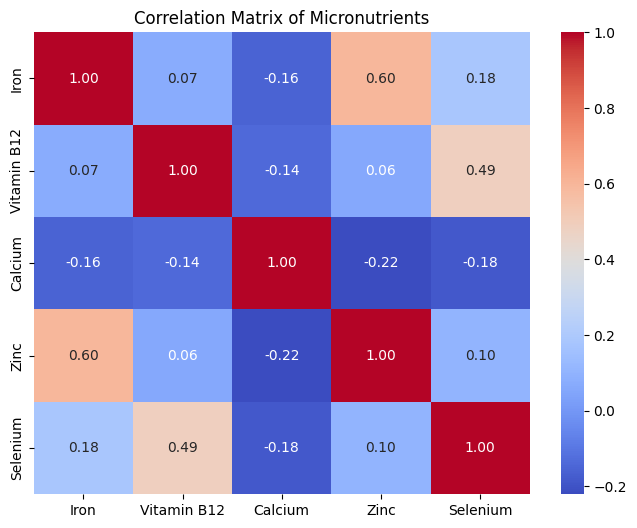

In [189]:
# Define the list of micronutrients to include in the correlation matrix
micronutrient_columns = ['Iron', 'Vitamin B12', 'Calcium', 'Zinc', 'Selenium']

# Calculate the correlation matrix for the selected micronutrients
micronutrient_correlation_matrix = daily_totals[micronutrient_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(micronutrient_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Micronutrients")
plt.show()

The correlation matrix shows that Iron and Zinc have a moderate positive correlation (0.60), suggesting they often appear together in similar foods. Vitamin B12 and Selenium also show some positive correlation (0.49), indicating possible clustering, likely due to animal-based sources. Other nutrients show weaker correlations, implying more independent distributions.

## Health-Related Analysis

In this section, I will assess key health indicators, including cholesterol, Omega-3, and Omega-6 fatty acids, to better understand the potential health risks and benefits of each menu type. These indicators are particularly relevant to cardiovascular health, inflammation management, and overall dietary quality.

### Key Question 10: What is the average daily cholesterol intake for each menu type, and which menu type has the highest level?

Cholesterol is essential for cellular structure and hormone production but, in excess, may raise the risk of heart disease. 

In [160]:
# Calculate the average daily cholesterol intake for each menu type
average_cholesterol = daily_totals.groupby('Menu Type')['Cholesterol'].mean()

# Display the results
average_cholesterol


Menu Type
fast food     267.277143
omnivore      824.029143
vegetarian    307.092857
Name: Cholesterol, dtype: float64

In [161]:
# Filter and sort ingredients by cholesterol content, then select the top 10
top_cholesterol_contributors = (
    df.sort_values(by='Cholesterol', ascending=False)
    [['Ingredient', 'Day', 'Meal', 'Cholesterol']]
    .head(10)
)

# Display the results
top_cholesterol_contributors

,Ingredient,Day,Meal,Cholesterol
0,3 large eggs,day 1,breakfast - tomato shakshuka,558.0
42,3 eggs,day 3,breakfast - classic omelet,558.0
237,3 eggs,day 7,breakfast - classic omelet,558.0
260,3 eggs,day 4,breakfast - cauliflower frittata,558.0
275,3 eggs,day 5,breakfast - frittata with leeks and zucchini,558.0
172,200 g prawns,day 4,lunch - spaghetti with chili and shrimp,422.0
249,200 g prawns,day 7,lunch - spaghetti with chili and shrimp,422.0
326,2 eggs,day 7,breakfast - green spinach pancakes,372.0
157,2 eggs,day 4,breakfast - kimchi pancakes,372.0
184,2 eggs,day 5,breakfast - zucchini waffles,372.0



Based on the analysis, the omnivore menu has the highest average daily cholesterol intake (811 mg), followed by the vegetarian menu (307 mg) and the fast food menu (267 mg). The primary contributors to cholesterol levels, particularly in the omnivore and vegetarian menus, are egg-based ingredients, which are known for their high cholesterol content.

 **Recommendation**: while the omnivore menu's cholesterol level exceeds the general recommended daily limit of 300 mg, research suggests that dietary cholesterol from eggs may not significantly impact blood cholesterol levels for most individuals. Studies indicate that, for many people, cholesterol intake from eggs does not lead to increased LDL (bad) cholesterol or cardiovascular risk, largely due to the presence of beneficial nutrients like protein, vitamins, and minerals. [Learn more about dietary cholesterol and eggs](https://www.heart.org/en/healthy-living/healthy-eating/eat-smart/nutrition-basics/eggs-and-cholesterol).

### Key Question 11: Which menu type provides the highest levels of Omega-3 and Omega-6 fatty acids, and how do these contribute to heart health?

Omega-3 and Omega-6 fatty acids are vital for reducing inflammation and supporting heart health, with Omega-3s particularly known for their protective effects against cardiovascular disease. 

In [162]:
# Calculate the average daily intake of Omega-3 and Omega-6 fatty acids for each menu type
average_omega = daily_totals.groupby('Menu Type')[['Omega-3 Fatty Acids', 'Omega-6 Fatty Acids']].mean()

# Display the results
average_omega

,Omega-3 Fatty Acids,Omega-6 Fatty Acids
Menu Type,,
fast food,1.368143,0.003214
omnivore,0.182400,0.003971
vegetarian,0.164186,0.000986


The fast food menu shows the highest Omega-3 intake (1.37 mg) but remains far below the recommended 250 mg/day. Both the omnivore and vegetarian menus also fall short in Omega-3 and Omega-6 levels.

However, due to over 200 missing values replaced with 0 during data cleaning, the Omega-3 and Omega-6 data are insufficient for reliable conclusions. Further data collection is needed for an accurate assessment.

#### Assessing Health-Related Nutrients

This code helps identify if there are correlations between nutrients associated with heart health risks, such as Sodium and Cholesterol.

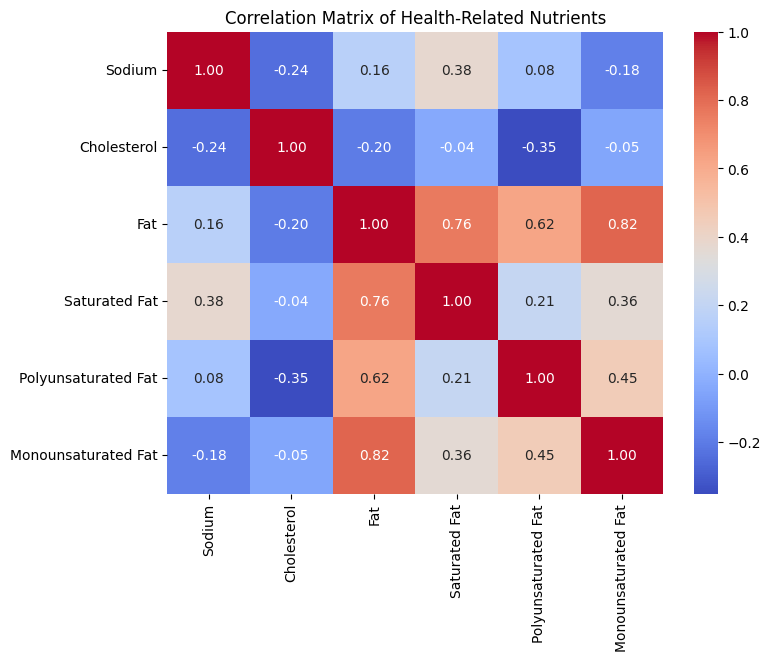

In [188]:
# Select the relevant columns for heart health analysis
health_related_columns = ['Sodium', 'Cholesterol', 'Fat', 'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat']

# Calculate the correlation matrix
correlation_matrix_health = daily_totals[health_related_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_health, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Health-Related Nutrients")
plt.show()

The correlation matrix reveals that fat has strong positive correlations with both saturated and monounsaturated fats, indicating these types of fats frequently occur together in foods. Sodium and cholesterol, on the other hand, show low correlations with other nutrients, suggesting they vary more independently.

## Nutrient Trends by Day

### Key Question 12: How do calorie levels vary day-to-day for each menu type?

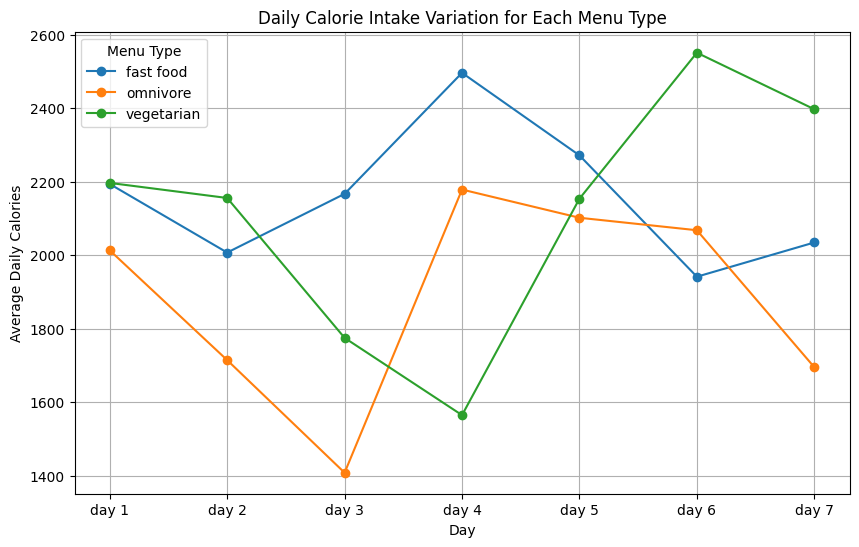

In [163]:
# Group by 'Menu Type' and 'Day' to calculate the average daily calorie intake for each menu type
daily_calories = daily_totals.groupby(['Menu Type', 'Day'])['Calories'].mean().unstack()

# Plot the daily calorie intake for each menu type
plt.figure(figsize=(10, 6))
for menu_type in daily_calories.index:
    plt.plot(daily_calories.columns, daily_calories.loc[menu_type], marker='o', label=menu_type)

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Average Daily Calories')
plt.title('Daily Calorie Intake Variation for Each Menu Type')
plt.legend(title='Menu Type')
plt.grid()
plt.show()


In [164]:
# Calculate the mean weekly calorie intake for each menu type
mean_calories_per_week = daily_totals.groupby('Menu Type')['Calories'].mean()

# Display the results
mean_calories_per_week

Menu Type
fast food     2159.212857
omnivore      1883.118857
vegetarian    2113.820000
Name: Calories, dtype: float64

The fast food menu maintains a steady calorie intake around 2200-2500 calories per day, reflecting its calorie-dense nature. The omnivore menu, however, shows significant daily fluctuations, with a sharp drop on Day 2, a low point on Day 3, and peaks on Days 4 and 5. This variation suggests a more diverse diet with changes in meal types or portion sizes across the week. The vegetarian menu also varies, with higher calorie levels, especially on Days 4 and 7, indicating certain days with more nutrient-dense or larger meals. These trends show that while the fast food menu remains consistent, the omnivore and vegetarian menus provide more variety in daily calorie intake.

### Key Question 13: How do daily trends for sugars vary across menu types?

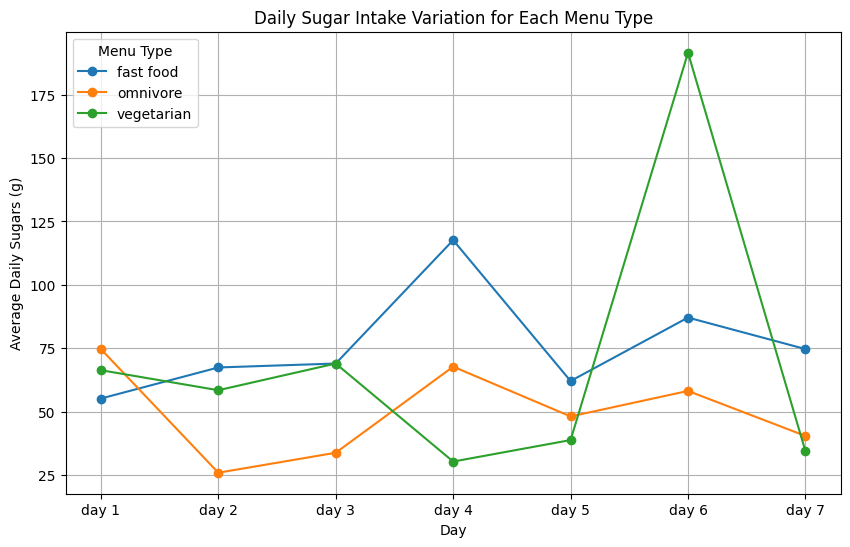

In [165]:
# Group by 'Menu Type' and 'Day' to calculate the average daily sugar intake for each menu type
daily_sugars = daily_totals.groupby(['Menu Type', 'Day'])['Sugars'].mean().unstack()

# Plot the daily sugar intake for each menu type
plt.figure(figsize=(10, 6))
for menu_type in daily_sugars.index:
    plt.plot(daily_sugars.columns, daily_sugars.loc[menu_type], marker='o', label=menu_type)

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Average Daily Sugars (g)')
plt.title('Daily Sugar Intake Variation for Each Menu Type')
plt.legend(title='Menu Type')
plt.grid()
plt.show()

In [166]:
# Calculate the mean weekly sugar intake for each menu type
mean_sugar_per_week = daily_totals.groupby('Menu Type')['Sugars'].mean()

# Display the results
mean_sugar_per_week

Menu Type
fast food     76.16
omnivore      49.86
vegetarian    69.85
Name: Sugars, dtype: float64

In [167]:
# Filter for top sugar-contributing ingredients in the vegetarian menu
vegetarian_sugar_top = (
    df[df['Menu Type'] == 'vegetarian']
    .sort_values(by='Sugars', ascending=False)
    [['Ingredient', 'Day', 'Meal', 'Sugars']]
    .head(5)
)

# Display the results
vegetarian_sugar_top

,Ingredient,Day,Meal,Sugars
317,3 large eggplants,day 6,"supper - vegetable caviar of eggplant, peppers...",65.47
304,400 g fresh blueberries,day 6,snack,39.84
118,400 g red currant,day 3,snack,29.48
66,juice of 1/4 lemon,day 1,breakfast - avocado toast,28.70
284,400 g fresh strawberries,day 5,snack,19.56


The recommended daily sugar intake is 25-50g. Here’s how each menu compares:

- Fast Food Menu: 76.16g — exceeds the recommended range.
- Omnivore Menu: 49.86g — near the upper limit.
- Vegetarian Menu: 69.85g — above the range, mainly due to natural sugars from fruits and vegetables, like eggplant, blueberries, and currants. To reduce sugar levels in the vegetarian menu, consider decreasing the portion size of the vegetable caviar with eggplant and peppers, as it contributes significantly to sugar intake. 

### Key Question 14: Are there significant variations in protein intake across the week?

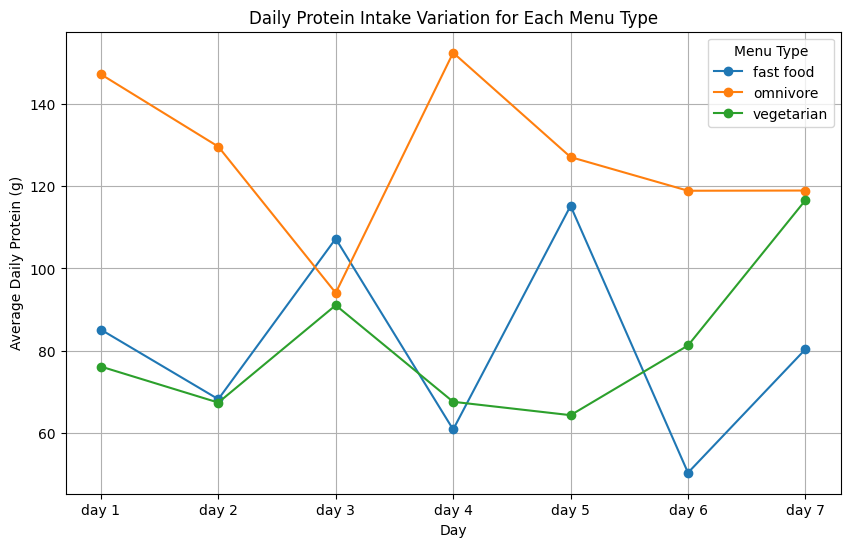

In [168]:
import matplotlib.pyplot as plt

# Calculate the average daily protein intake by day for each menu type
daily_protein = daily_totals.groupby(['Day', 'Menu Type'])['Protein'].mean().unstack()

# Plot the daily protein intake for each menu type
plt.figure(figsize=(10, 6))
for menu_type in daily_protein.columns:
    plt.plot(daily_protein.index, daily_protein[menu_type], marker='o', label=menu_type)

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Average Daily Protein (g)')
plt.title('Daily Protein Intake Variation for Each Menu Type')
plt.legend(title='Menu Type')
plt.grid()
plt.show()

The plot shows significant variations in daily protein intake across the week for each menu type:

- Omnivore: protein intake is consistently higher compared to the other menus, peaking on day 4, suggesting a higher emphasis on protein-rich foods in the diet.
- Fast Food: protein levels fluctuate more dramatically, with a sharp drop on day 5 and another low on day 7. This inconsistency reflects the irregular composition of fast food items, which may not prioritize protein.
- Vegetarian: protein intake is relatively stable throughout the week, though it slightly decreases on day 5. This trend suggests a steady intake of plant-based protein sources, albeit generally lower than the omnivore diet.

## Meal-Based Analysis

In this section, we’ll explore nutrient distribution across meals (breakfast, lunch, dinner) within each menu type, identifying patterns and meals that may have notable spikes or deficits in specific nutrients.

In [175]:
# Updated list of key nutrients to focus on
key_nutrients = ['Calories', 'Protein', 'Fat', 'Saturated Fat', 'Carbohydrates', 'Sugars', 'Fiber', 'Sodium', 'Iron', 'Vitamin B12']

# Group by 'Menu Type' and 'Meal' and calculate the mean of the selected nutrients
meal_nutrient_variation = df.groupby(['Menu Type', 'Meal'])[key_nutrients].mean()

# Display the result
meal_nutrient_variation.head(60)

Calories  \
Menu Type  Meal                                                             
fast food  breakfast - burrito                                 311.170000   
           breakfast - french toast sticks                     365.420000   
           breakfast - ham croissant sandwich                  246.205000   
           breakfast - ham sandwich                            252.870000   
           breakfast - ham, egg, and cheese sandwich           274.220000   
           breakfast - pancakes with maple syrup               233.393333   
           lunch - bacon cheeseburger                          595.020000   
           lunch - big mac                                     562.830000   
           lunch - big mac with green salad                    234.626667   
           lunch - cheeseburger with green salad               211.820000   
           lunch - fish fillet sandwich with coleslaw          361.035000   
           lunch - quarter pounder with cheese and side salad  113.260000   
           lunch - whopper                                     678.030000   
           snack                                               172.872143   
           supper - cheese quesadilla with guacamole and c...  323.955000   
           supper - chips and salsa                            589.500000   
           supper - fried chicken with fries                   205.096667   
           supper - grilled cheese with tomato soup            359.110000   
           supper - mozzarella sticks and beef tacos           394.210000   
           supper - pepperoni pizza                            552.720000   
omnivore   breakfast - classic omelet                           86.813333   
           breakfast - kimchi pancakes                          56.828750   
           breakfast - perfect winter scrambled eggs            72.330909   
           breakfast - smurkbrod with herring                   65.568571   
           breakfast - tomato shakshuka                         83.041667   
           breakfast - zucchini waffles                        100.462857   
           lunch - autumn pasta with broccoli and anchovies     55.221250   
           lunch - chicken legs with potatoes and tomatoes      83.175714   
           lunch - pasta                                       217.400000   
           lunch - pasta                                        45.496667   
           lunch - quick pasta with pollock caviar              77.203667   
           lunch - roasted soba with beef and tamari sauce      52.980000   
           lunch - spaghetti with chili and shrimp             113.583333   
           snack                                               104.902500   
           supper - baked wild alaska pollock                   62.790000   
           supper - instant light pike perch with rosemary      61.478000   
           supper - mackerel grill with scandinavian marin...   51.036250   
           supper - millet with anchovies and parmesan          62.772000   
           supper - tuna steak with quinoa salad and baked...   72.225556   
           supper - very tender sea bass                       126.434000   
           supper - wild salmon steaks with vegetables         116.491667   
vegetarian breakfast - avocado toast                           131.310000   
           breakfast - berry breakfast with spelt               56.135000   
           breakfast - cauliflower frittata                     75.678333   
           breakfast - coconut pancakes without flour           85.260000   
           breakfast - frittata with leeks and zucchini         54.308571   
           breakfast - green spinach pancakes                  135.330000   
           breakfast - three-minute flax porridge               72.035000   
           lunch - 'steak' of tofu with mushrooms or guaca...   67.348750   
           lunch - broccoli in oyster sauce with cashews       112.530000   
           lunch - gluten-free pasta with pasata             

Key findings by **meal type**:

- Calories: fast food lunches and suppers are highest in calories. Omnivore and vegetarian meals distribute calories more evenly.
- Protein: fast food and omnivore lunches have high protein due to meat, while vegetarian meals rely on legumes.
- Fat: fast food is consistently high in fat, especially at lunch and supper; omnivore and vegetarian meals show moderate levels.
- Carbohydrates: fast food breakfasts (e.g., pancakes) and vegetarian suppers (e.g., starchy vegetables) have high carbs.
- Sugars: vegetarian meals show sugar spikes due to ingredients like eggplants and fruits.
- Sodium: fast food meals, particularly lunch and supper, have high sodium levels.
- Iron & B12: omnivore meals are richest in iron and B12; vegetarian options lack B12 due to limitations on  animal products.

Each menu type has distinct characteristics: fast food is consistently high in calories and sodium, which may be less ideal for balanced nutrition; omnivore meals offer a more balanced nutrient profile, while vegetarian options provide lower B12 levels due to the limiations on animal products.

## Comparative Analysis

In this section, I aim to evaluate the nutrient balance across different menu types, focusing on fiber, protein, and overall nutrient density. By examining these aspects, I can identify which menu provides a more balanced and nutritionally diverse intake, supporting health goals more effectively.

### Key Question 15: Which menu type offers the best balance between fiber and protein intake?

In [179]:
# Calculate the average daily intake of fiber and protein for each menu type
fiber_protein_balance = daily_totals.groupby('Menu Type')[['Fiber', 'Protein']].mean()

# Calculate the ratio of fiber to protein
fiber_protein_balance['Fiber_Protein_Ratio'] = fiber_protein_balance['Fiber'] / fiber_protein_balance['Protein']

# Display the results
fiber_protein_balance[['Fiber', 'Protein', 'Fiber_Protein_Ratio']]

,Fiber,Protein,Fiber_Protein_Ratio
Menu Type,,,
fast food,14.830000,81.057143,0.182957
omnivore,32.662857,126.863857,0.257464
vegetarian,54.964286,80.632857,0.681661


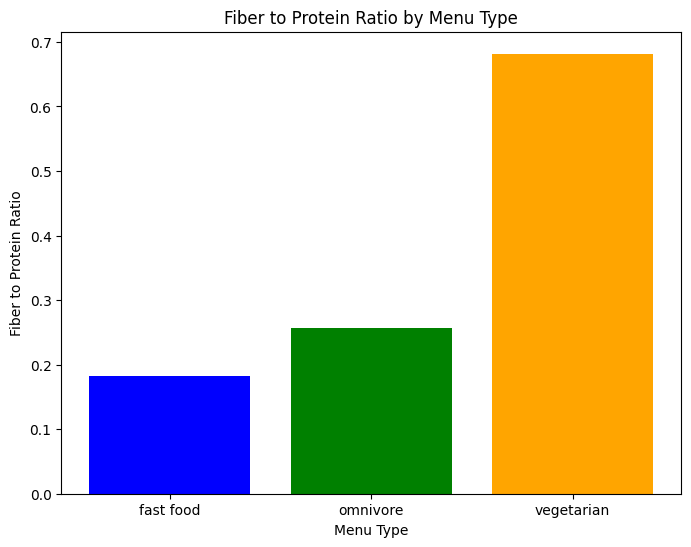

In [180]:
# Plot the fiber-to-protein ratio for each menu type
plt.figure(figsize=(8, 6))
plt.bar(fiber_protein_balance.index, fiber_protein_balance['Fiber_Protein_Ratio'], color=['blue', 'green', 'orange'])
plt.xlabel('Menu Type')
plt.ylabel('Fiber to Protein Ratio')
plt.title('Fiber to Protein Ratio by Menu Type')
plt.show()

The chart shows that the vegetarian menu has the highest fiber-to-protein ratio, indicating a more balanced intake between fiber and protein, largely due to plant-based ingredients rich in fiber. The omnivore menu has a moderate ratio, suggesting a balanced mix but with less fiber compared to protein. The fast food menu has the lowest ratio, reflecting its lower fiber content relative to protein, which could impact overall dietary balance.

### Key Question 16: How does the omnivore menu compare to the vegetarian menu in terms of micronutrient density?

In this context, nutrient density refers to the amount of essential nutrients (like vitamins, minerals, and macronutrients) per calorie. A menu with high nutrient density provides more nutrients per calorie, making it a more efficient source of nutrition.

In [182]:
# Calculate nutrient density for each menu type by dividing total nutrient values by total calories
# Focus on key nutrients: Protein, Fiber, Iron, Vitamin B12, etc.
nutrient_columns = ['Carbohydrates', 'Fat', 'Protein', 'Fiber', 'Iron', 'Vitamin B12']
density_df = daily_totals.groupby('Menu Type')[nutrient_columns + ['Calories']].sum()

# Calculate nutrient density by dividing each nutrient by total calories
for nutrient in nutrient_columns:
    density_df[nutrient + '_Density'] = density_df[nutrient] / density_df['Calories']

# Select only the density columns for comparison
nutrient_density = density_df[[col for col in density_df.columns if '_Density' in col]]

# Display the results
nutrient_density


,Carbohydrates_Density,Fat_Density,Protein_Density,Fiber_Density,Iron_Density,Vitamin B12_Density
Menu Type,,,,,,
fast food,0.107911,0.047414,0.037540,0.006868,0.006473,0.002105
omnivore,0.093044,0.043159,0.067369,0.017345,0.010190,0.006558
vegetarian,0.124268,0.045365,0.038146,0.026002,0.010731,0.001120


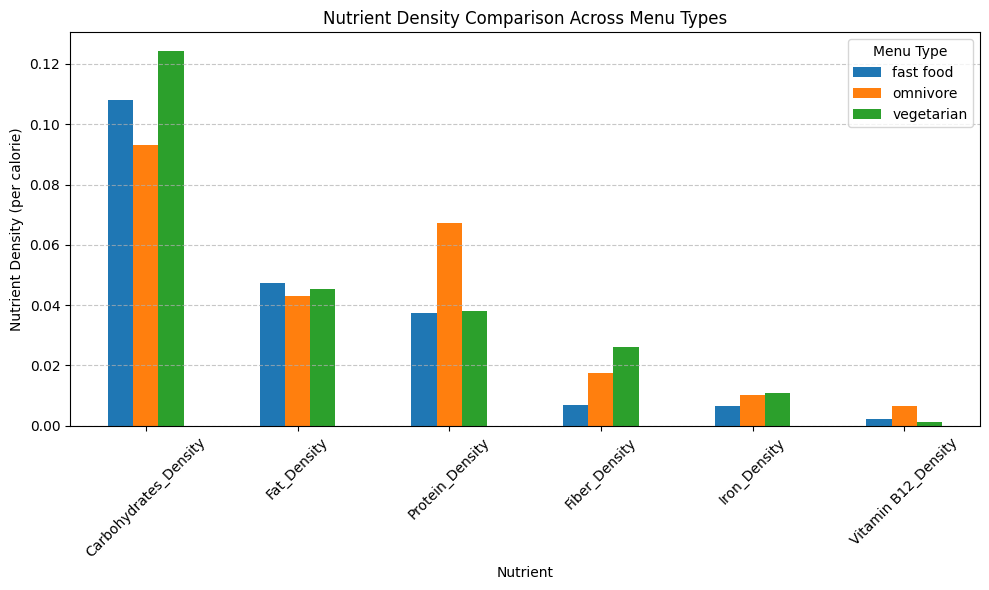

In [183]:
# Transpose the DataFrame for better visualization
nutrient_density_T = nutrient_density.transpose()

# Plotting
nutrient_density_T.plot(kind='bar', figsize=(10, 6))
plt.title("Nutrient Density Comparison Across Menu Types")
plt.ylabel("Nutrient Density (per calorie)")
plt.xlabel("Nutrient")
plt.xticks(rotation=45)
plt.legend(title="Menu Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The results indicate that the vegetarian menu has the highest fiber and carbohydrate density, while the omnivore menu excels in protein, iron, and Vitamin B12 density. Fast food is generally lower in nutrient density across all categories, particularly in fiber. This suggests that the vegetarian menu is beneficial for fiber intake, while the omnivore menu offers a balanced profile with essential micronutrients like iron and B12, which are limited in the vegetarian options. Fast food may lack overall nutrient density compared to the other menus.

#### Exploring macronutrient influence on caloric density


This code calculates and visualizes the correlation matrix between calories and key macronutrients (protein, fat, carbohydrates) to identify which nutrients most strongly influence calorie intake.

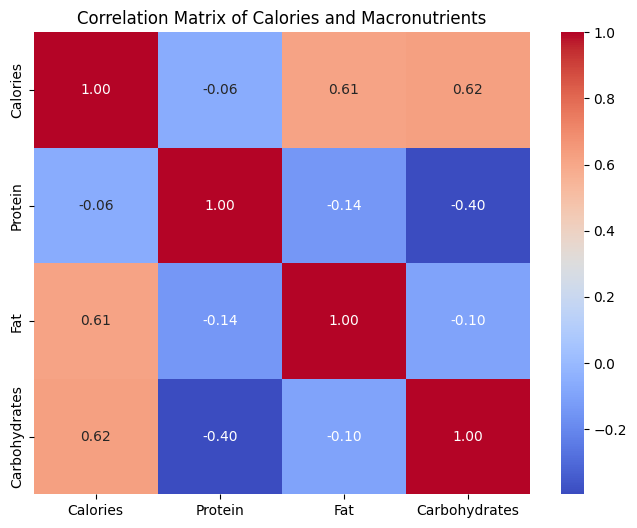

In [185]:
# Select relevant columns for macronutrients and calories
macronutrient_columns = ['Calories', 'Protein', 'Fat', 'Carbohydrates']
correlation_matrix = daily_totals[macronutrient_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Calories and Macronutrients")
plt.show()

The correlation matrix shows that calories are mainly driven by carbohydrates (0.62) and fat (0.61), while protein has a negligible impact on calorie count.

## Conclusion

In today's fast-paced world, dietary choices significantly impact our health and well-being. With various dietary options available, understanding the nutritional value of different menus is crucial for making informed decisions. This analysis explores three popular diets: vegetarian, omnivore, and fast food, comparing their nutritional profiles to identify which menu supports better health outcomes.

**Healthiest Diet**

The vegetarian diet appears the healthiest overall, with higher fiber and lower cholesterol compared to the other diets. It also has a moderate amount of protein and relatively low sodium levels, beneficial for cardiovascular health.

**Dietary Improvements**:

- Fast Food Diet: high in calories, fat (especially saturated fat), sugars, and sodium. Reducing processed items and incorporating more vegetables, whole grains, and lean protein could improve nutrient balance and reduce the negative health impact.

- Omnivore Diet: although it has a good protein content, sodium and cholesterol levels are higher than in the vegetarian diet. Reducing red meat and adding plant-based options may help improve heart health markers.